# Basic UBI reform

This implements a basic $100 UBI. Among other things, it demonstrates that the bottom decile's negative after-tax income leads to this UBI creating a sharp *negative* percent change to after-tax income.

*taxcalc version: 0.14.3  |  Data: CPS  |  Tax year: 2018  |  Type: Static  |  Author: Max Ghenis  |  Date run: 2018-01-15*

## Imports

In [1]:
# from __future__ import print_function  # Necessary only if using Python 2.7.
import taxcalc as tc
import matplotlib as mpl
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print tc.__version__

0.14.3


## Setup

Use publicly-available CPS input file.

In [3]:
recs = tc.Records.cps_constructor()

Specify `Calculator` object for static analysis of current-law policy.

In [4]:
pol = tc.Policy()
base_calc = tc.Calculator(policy=pol, records=recs)

You loaded data for 2014.
Tax-Calculator startup automatically extrapolated your data to 2014.


In [5]:
base_calc.advance_to_year(2018)
base_calc.calc_all()

Create non-taxable UBI reform.

In [6]:
ubi_amount = 100
ubi_reform = {2018: {'_UBI1': [ubi_amount], 
                     '_UBI2': [ubi_amount], 
                     '_UBI3': [ubi_amount],
                     '_UBI_ecrt': [1.0]}}

Implement reform and check for reform error messages.

In [7]:
pol.implement_reform(ubi_reform)
if pol.reform_errors:
    print(pol.reform_errors)
    exit(1)

## Calculate

Specify Calculator object for static analysis of reform policy.

In [8]:
ubi_calc = tc.Calculator(policy=pol, records=recs)
ubi_calc.advance_to_year(2018)
ubi_calc.calc_all()

You loaded data for 2014.
Tax-Calculator startup automatically extrapolated your data to 2014.


## Results

Generate diagnostic and distribution tables.

In [9]:
base_calc.diagnostic_table(1)

,2018
Returns (#m),169.9
AGI ($b),"10,503.8"
Itemizers (#m),68.0
Itemized Deduction ($b),"1,500.9"
Standard Deduction Filers (#m),83.9
Standard Deduction ($b),771.4
Personal Exemption ($b),"1,222.6"
Taxable Income ($b),"7,421.9"
Regular Tax ($b),"1,369.7"
AMT Income ($b),"9,664.5"


In [10]:
ubi_calc.diagnostic_table(1)

,2018
Returns (#m),169.9
AGI ($b),"10,503.8"
Itemizers (#m),68.0
Itemized Deduction ($b),"1,500.9"
Standard Deduction Filers (#m),83.9
Standard Deduction ($b),771.4
Personal Exemption ($b),"1,222.6"
Taxable Income ($b),"7,421.9"
Regular Tax ($b),"1,369.7"
AMT Income ($b),"9,664.5"


*Errors can be ignored.*

In [11]:
base_dist, ubi_dist = base_calc.distribution_tables(ubi_calc)
base_dist

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


,num_returns_AMT,num_returns_ItemDed,s006,num_returns_StandardDed,refund,taxbc,c04600,c00100,iitax,aftertax_income,...,expanded_income,standard,payrolltax,c04470,c05800,combined,c04800,c62100,othertaxes,c09600
0,0,"11,007","16,989,417","9,514,456","1,657,208,090","11,855,140","89,401,300,451","-11,240,697,104","-1,651,496,798","-5,300,601,734",...,"-3,954,421,032","111,904,243,481","2,997,677,501","78,529,229","11,855,140","1,346,180,703","408,622,916","-11,276,303,784",0,0
1,"8,598","285,984","16,988,286","11,470,564","12,819,467,339","221,678,978","100,300,593,232","86,940,083,985","-12,649,877,734","168,674,465,736",...,"167,287,864,037","132,744,054,599","11,263,276,035","3,515,146,278","226,349,359","-1,386,601,699","3,226,509,469","85,243,899,621",0,"4,670,381"
2,"23,611","1,551,669","16,990,004","11,861,799","17,322,410,577","2,604,323,094","107,366,843,081","154,875,198,499","-15,198,888,005","287,658,706,707",...,"292,999,652,851","133,541,065,412","20,539,834,149","17,749,357,828","2,615,595,562","5,340,946,144","27,790,536,785","144,652,030,563",0,"11,272,469"
3,"26,545","3,450,323","16,989,656","12,286,840","20,276,267,753","9,040,309,146","121,491,492,107","289,127,430,383","-12,741,983,893","402,402,145,508",...,"429,197,375,240","129,663,073,583","39,537,213,625","39,663,954,027","9,069,732,279","26,795,229,732","85,914,375,133","265,447,990,763",0,"29,423,133"
4,"33,717","5,174,544","16,989,955","11,416,180","15,640,861,726","21,132,408,568","130,259,413,108","446,301,286,946","2,690,574,146","520,452,605,849",...,"584,466,035,065","121,590,725,057","61,322,855,071","66,431,514,644","21,192,581,967","64,013,429,217","183,930,702,027","406,017,800,667",0,"60,173,400"
5,"31,749","6,833,645","16,989,241","10,054,928","7,233,816,215","39,037,692,244","137,435,632,486","644,108,252,402","27,144,594,809","665,730,750,288",...,"780,912,118,379","108,298,848,367","88,036,773,282","100,936,737,340","39,118,519,197","115,181,368,091","326,539,834,256","583,147,447,856",0,"80,826,953"
6,"28,735","9,374,504","16,989,686","7,602,574","1,394,981,419","71,457,311,785","144,399,999,481","929,720,016,922","63,422,983,600","861,517,844,103",...,"1,050,930,164,547","82,261,853,133","125,989,336,844","163,481,102,140","71,512,985,946","189,412,320,444","549,620,517,058","830,409,069,764",0,"55,674,161"
7,"29,873","11,754,138","16,989,485","5,232,385","221,930,386","128,172,826,911","158,730,976,168","1,336,313,317,589","119,605,236,775","1,153,417,678,914",...,"1,455,732,928,026","57,474,541,527","182,710,012,337","237,771,643,368","128,247,866,978","302,315,249,112","886,336,808,794","1,197,214,133,468",0,"75,040,066"
8,"50,582","13,941,750","16,989,613","3,045,253","42,542,298","219,836,055,534","178,895,671,723","1,951,977,019,116","212,262,611,975","1,629,278,276,232",...,"2,110,994,520,844","34,633,836,751","269,453,632,637","335,401,404,723","219,940,503,713","481,716,244,612","1,404,676,804,618","1,761,850,733,363",0,"104,448,179"
9,"3,988,726","15,613,627","16,989,497","1,375,535","3,173,821","878,196,420,047","170,792,255,541","4,675,707,789,560","904,623,659,263","3,599,332,834,242",...,"4,935,668,979,335","16,812,214,805","431,712,485,831","535,913,728,457","895,791,261,082","1,336,336,145,094","3,953,473,944,797","4,401,828,925,300","9,321,080,947","17,594,841,036"


In [12]:
ubi_dist

,num_returns_AMT,num_returns_ItemDed,s006,num_returns_StandardDed,refund,taxbc,c04600,c00100,iitax,aftertax_income,...,expanded_income,standard,payrolltax,c04470,c05800,combined,c04800,c62100,othertaxes,c09600
0,0,"11,007","16,989,417","9,514,456","1,657,208,090","11,855,140","89,401,300,451","-11,240,697,104","-1,651,496,798","-2,692,208,496",...,"-1,346,027,794","111,904,243,481","2,997,677,501","78,529,229","11,855,140","1,346,180,703","408,622,916","-11,276,303,784",0,0
1,"8,598","285,984","16,988,286","11,470,564","12,819,467,339","221,678,978","100,300,593,232","86,940,083,985","-12,649,877,734","171,090,042,434",...,"169,703,440,735","132,744,054,599","11,263,276,035","3,515,146,278","226,349,359","-1,386,601,699","3,226,509,469","85,243,899,621",0,"4,670,381"
2,"23,611","1,551,669","16,990,004","11,861,799","17,322,410,577","2,604,323,094","107,366,843,081","154,875,198,499","-15,198,888,005","290,209,545,626",...,"295,550,491,770","133,541,065,412","20,539,834,149","17,749,357,828","2,615,595,562","5,340,946,144","27,790,536,785","144,652,030,563",0,"11,272,469"
3,"26,545","3,450,323","16,989,656","12,286,840","20,276,267,753","9,040,309,146","121,491,492,107","289,127,430,383","-12,741,983,893","405,271,567,369",...,"432,066,797,101","129,663,073,583","39,537,213,625","39,663,954,027","9,069,732,279","26,795,229,732","85,914,375,133","265,447,990,763",0,"29,423,133"
4,"33,717","5,174,544","16,989,955","11,416,180","15,640,861,726","21,132,408,568","130,259,413,108","446,301,286,946","2,690,574,146","523,540,755,260",...,"587,554,184,476","121,590,725,057","61,322,855,071","66,431,514,644","21,192,581,967","64,013,429,217","183,930,702,027","406,017,800,667",0,"60,173,400"
5,"31,749","6,833,645","16,989,241","10,054,928","7,233,816,215","39,037,692,244","137,435,632,486","644,108,252,402","27,144,594,809","668,985,991,201",...,"784,167,359,292","108,298,848,367","88,036,773,282","100,936,737,340","39,118,519,197","115,181,368,091","326,539,834,256","583,147,447,856",0,"80,826,953"
6,"28,735","9,374,504","16,989,686","7,602,574","1,394,981,419","71,457,311,785","144,399,999,481","929,720,016,922","63,422,983,600","864,939,821,132",...,"1,054,352,141,576","82,261,853,133","125,989,336,844","163,481,102,140","71,512,985,946","189,412,320,444","549,620,517,058","830,409,069,764",0,"55,674,161"
7,"29,873","11,754,138","16,989,485","5,232,385","221,930,386","128,172,826,911","158,730,976,168","1,336,313,317,589","119,605,236,775","1,157,185,694,662",...,"1,459,500,943,774","57,474,541,527","182,710,012,337","237,771,643,368","128,247,866,978","302,315,249,112","886,336,808,794","1,197,214,133,468",0,"75,040,066"
8,"50,582","13,941,750","16,989,613","3,045,253","42,542,298","219,836,055,534","178,895,671,723","1,951,977,019,116","212,262,611,975","1,633,532,056,955",...,"2,115,248,301,567","34,633,836,751","269,453,632,637","335,401,404,723","219,940,503,713","481,716,244,612","1,404,676,804,618","1,761,850,733,363",0,"104,448,179"
9,"3,988,726","15,613,627","16,989,497","1,375,535","3,173,821","878,196,420,047","170,792,255,541","4,675,707,789,560","904,623,659,263","3,603,904,045,007",...,"4,940,240,190,100","16,812,214,805","431,712,485,831","535,913,728,457","895,791,261,082","1,336,336,145,094","3,953,473,944,797","4,401,828,925,300","9,321,080,947","17,594,841,036"


## Plotting

Generate a decile graph and display it using Bokeh.

In [13]:
fig = base_calc.decile_graph(ubi_calc)

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

Exception ValueError: "Buffer dtype mismatch, expected 'Python object' but got 'long'" in 'pandas._libs.lib.is_bool_array' ignored


In [14]:
output_notebook()

Loading BokehJS ...

In [15]:
show(fig)

## Exclude negative expanded income



In [16]:
def calc_df_w_percentile(calc, remove_negatives=False):
    df = calc.dataframe(['s006', 'expanded_income', 
                         'aftertax_income']).sort_values(by=['expanded_income'])
    if remove_negatives:
        df = df.loc[df['expanded_income'] >= 0]
    df['expanded_income_percentile'] = 100 * df['s006'].cumsum() / df['s006'].sum()
    df['expanded_income_decile'] = np.ceil(df['expanded_income_percentile'] / 10).astype(int)
    # One record is getting set to 11 due to rounding.
    df.loc[df['expanded_income_decile'] == 11, 'expanded_income_decile'] = 10
    # Set as string for charting.
    df['expanded_income_decile_str'] = (
        (10 * (df['expanded_income_decile'] - 1)).map(str) + '-' + 
        (10 * df['expanded_income_decile']).map(str))
    df['total_aftertax_income'] = df['s006'] * df['aftertax_income']
    return df

In [17]:
base_df_w_neg = calc_df_w_percentile(base_calc, remove_negatives=False)
base_df_wo_neg = calc_df_w_percentile(base_calc, remove_negatives=True)
ubi_df_w_neg = calc_df_w_percentile(ubi_calc, remove_negatives=False)
ubi_df_wo_neg = calc_df_w_percentile(ubi_calc, remove_negatives=True)

In [18]:
base_summary = base_df_wo_neg.groupby('expanded_income_decile_str', 
                                      as_index=False)['total_aftertax_income'].sum()
reform_summary = ubi_df_wo_neg.groupby('expanded_income_decile_str', 
                                          as_index=False)['total_aftertax_income'].sum()

In [19]:
decile_comparison = pd.merge(base_summary, reform_summary, on='expanded_income_decile_str')
decile_comparison['pct_change'] = (
    decile_comparison['total_aftertax_income_y'] / 
    decile_comparison['total_aftertax_income_x']) - 1
decile_comparison

,expanded_income_decile_str,total_aftertax_income_x,total_aftertax_income_y,pct_change
0,0-10,"24,643,700,585.83","27,195,848,012.65",0.10
1,10-20,"170,090,790,345.88","172,323,812,129.16",0.01
2,20-30,"288,338,093,383.07","290,727,674,859.00",0.01
3,30-40,"402,978,830,810.50","405,486,138,523.28",0.01
4,40-50,"520,575,183,261.32","523,770,003,131.49",0.01
5,50-60,"665,903,074,837.06","669,533,441,207.51",0.01
6,60-70,"861,387,736,339.68","864,774,139,427.40",0.00
7,70-80,"1,153,040,525,629.18","1,156,905,706,844.93",0.00
8,80-90,"1,628,373,947,649.16","1,632,663,575,579.63",0.00
9,90-100,"3,596,673,063,860.32","3,601,380,748,164.54",0.00


In [20]:
sns.set(style='white')
DPI = 300
mpl.rc("savefig", dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI

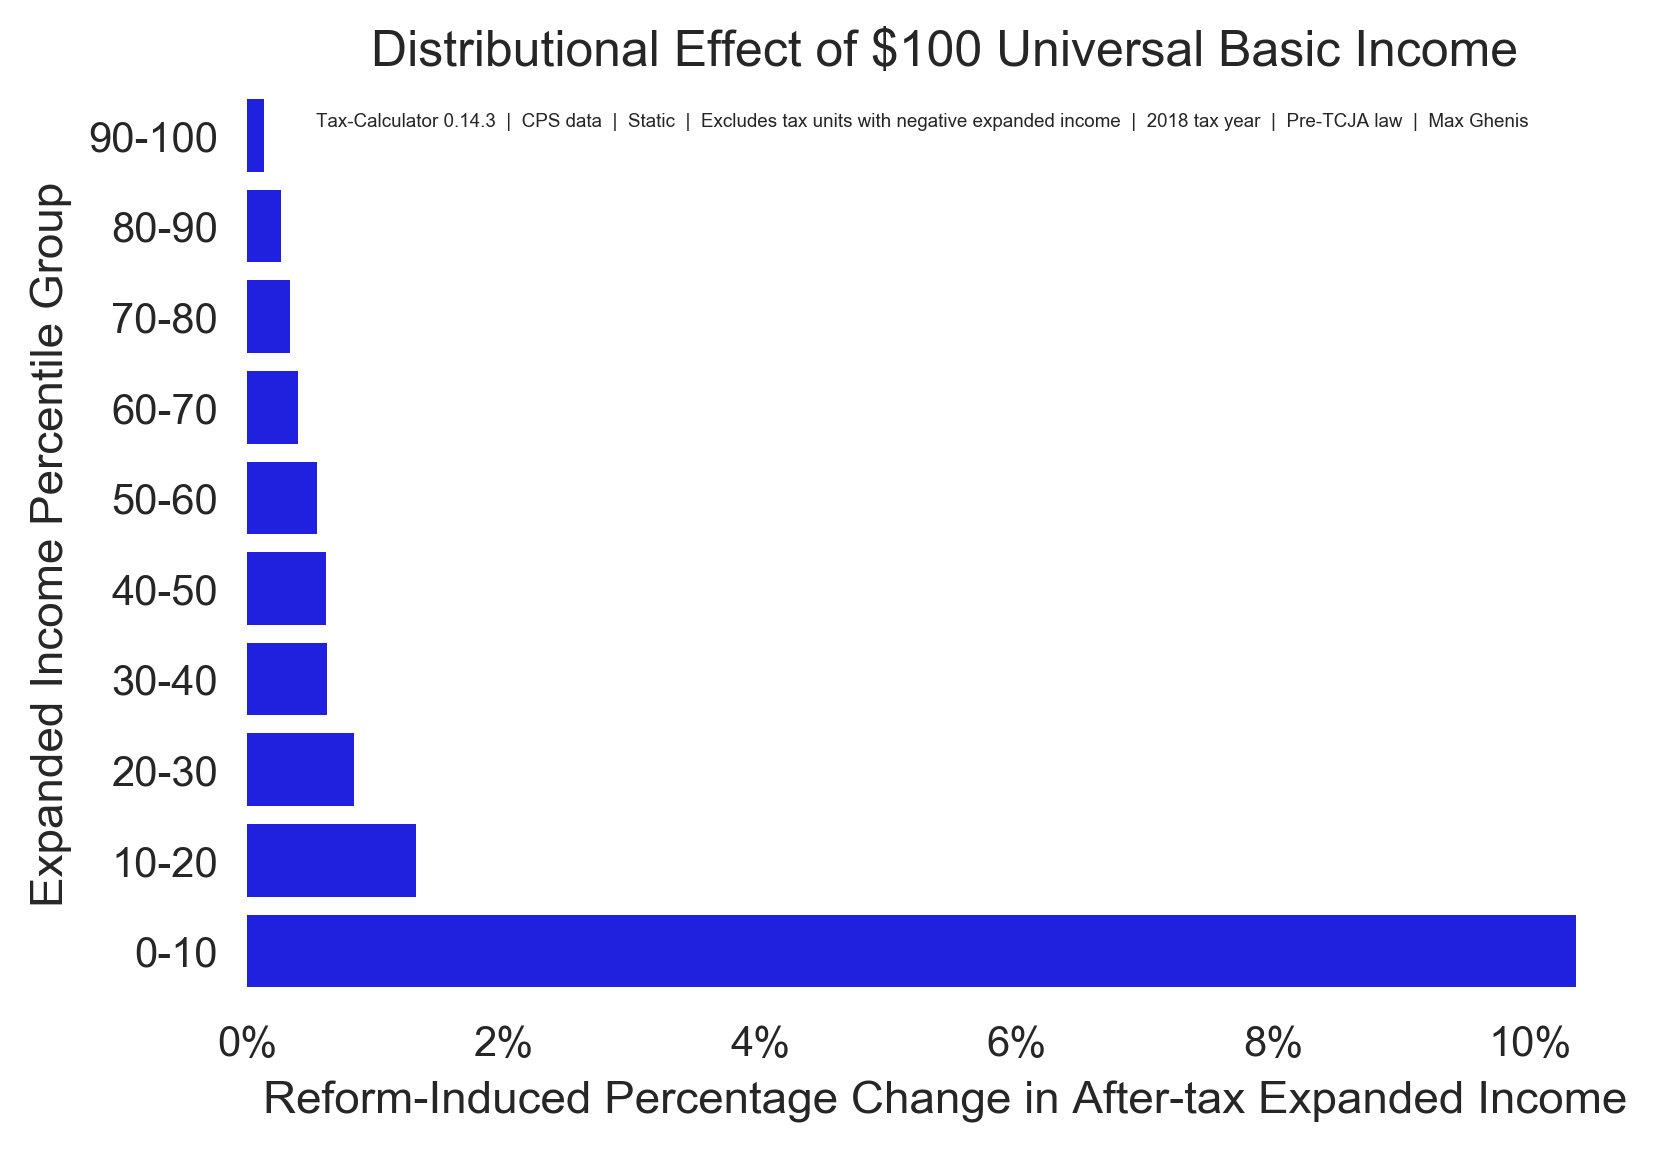

In [21]:
f, ax = plt.subplots() #figsize=(8, 8))
sns.barplot(y="expanded_income_decile_str", x="pct_change", data=decile_comparison,
            label="Total", color="b", orient='h', 
            order=list(reversed(decile_comparison['expanded_income_decile_str'])))
sns.despine(left=True, bottom=True)
vals = ax.get_xticks()
ax.set_xticklabels(['{:0.0f}%'.format(100 * x) for x in vals])
ax.set(xlabel='Reform-Induced Percentage Change in After-tax Expanded Income',
       ylabel='Expanded Income Percentile Group')
plt.title('Distributional Effect of $100 Universal Basic Income', loc='center')
plt.figtext(.5, .85, 
            'Tax-Calculator 0.14.3  |  CPS data  |  Static  ' +
            '|  Excludes tax units with negative expanded income  |  2018 tax year  |  Pre-TCJA law  ' +
            '|  Max Ghenis',
            fontsize=4.5, ha='center')
plt.show()

In [22]:
base_df_w_neg['s006'].sum()

169894839.66000009